In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x:x if x!=' ' else np.nan).astype(float)
df['TotalCharges'] = df['TotalCharges'].fillna(value=0)

In [ ]:
#divide numerical features and categorical features
cat_col = df.select_dtypes(object).columns.tolist()
cat_col.append('SeniorCitizen')
cat_col.remove('Churn')
cat_col.remove('customerID')
cat_col

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen']

In [ ]:
num_col = df.select_dtypes(exclude=object).columns.tolist()
num_col.remove('SeniorCitizen')
num_col

['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
df[cat_col]

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,0
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,0
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1


# Encoding all categorical features to dummy variables

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder(drop='if_binary')
df_cat = df[cat_col]
enc.fit_transform(df_cat)

<7043x37 sparse matrix of type '<class 'numpy.float64'>'
	with 91171 stored elements in Compressed Sparse Row format>

In [ ]:
a = pd.DataFrame({'gender':['Male','Female','Male'],'Income':['High',"Medium",'Low']})
a

,gender,Income
0,Male,High
1,Female,Medium
2,Male,Low


In [ ]:
enc = OneHotEncoder(drop='if_binary')
enc.fit_transform(a).toarray()

array([[1., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 1., 0.]])

In [ ]:
enc.get_feature_names_out()

array(['gender_Male', 'Income_High', 'Income_Low', 'Income_Medium'],
      dtype=object)

In [ ]:
enc = OneHotEncoder(drop='if_binary')
df_cat = df[cat_col]
enc.fit_transform(df_cat).toarray()

array([[0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 1., 0., 0.],
       [1., 1., 0., ..., 0., 1., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pd.DataFrame(enc.fit_transform(df_cat).toarray(),columns=enc.get_feature_names_out())

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7039,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7040,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7041,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
num_col

['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
cat_col

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen']

In [ ]:
enc = ColumnTransformer([('cat',OneHotEncoder(drop='if_binary'),cat_col),('num','passthrough',num_col)])

In [ ]:
enc.fit(df)

ColumnTransformer(transformers=[('cat', OneHotEncoder(drop='if_binary'),
                                 ['gender', 'Partner', 'Dependents',
                                  'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod',
                                  'SeniorCitizen']),
                                ('num', 'passthrough',
                                 ['tenure', 'MonthlyCharges', 'TotalCharges'])])

In [ ]:
enc.transform(df)

array([[0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 2.9850e+01,
        2.9850e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 3.4000e+01, 5.6950e+01,
        1.8895e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.0000e+00, 5.3850e+01,
        1.0815e+02],
       ...,
       [0.0000e+00, 1.0000e+00, 1.0000e+00, ..., 1.1000e+01, 2.9600e+01,
        3.4645e+02],
       [1.0000e+00, 1.0000e+00, 0.0000e+00, ..., 4.0000e+00, 7.4400e+01,
        3.0660e+02],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 6.6000e+01, 1.0565e+02,
        6.8445e+03]])

In [ ]:
pd.DataFrame(enc.transform(df),columns=enc.get_feature_names_out())

,cat__gender_Male,cat__Partner_Yes,cat__Dependents_Yes,cat__PhoneService_Yes,cat__MultipleLines_No,cat__MultipleLines_No phone service,cat__MultipleLines_Yes,cat__InternetService_DSL,cat__InternetService_Fiber optic,cat__InternetService_No,...,cat__Contract_Two year,cat__PaperlessBilling_Yes,cat__PaymentMethod_Bank transfer (automatic),cat__PaymentMethod_Credit card (automatic),cat__PaymentMethod_Electronic check,cat__PaymentMethod_Mailed check,cat__SeniorCitizen_1,num__tenure,num__MonthlyCharges,num__TotalCharges
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,29.85,29.85
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,34.0,56.95,1889.50
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,53.85,108.15
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,45.0,42.30,1840.75
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,24.0,84.80,1990.50
7039,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,72.0,103.20,7362.90
7040,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,11.0,29.60,346.45
7041,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0,74.40,306.60


#Logistic Regression

In [ ]:
#training data and test data split
df.drop(columns='customerID',inplace=True)
df['Churn'] = df['Churn'].apply(lambda x:1 if x=='Yes' else 0)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
X = df.drop(columns='Churn')
y = df['Churn']

In [ ]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
from sklearn.model_selection import train_test_split

In [ ]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=21)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

In [ ]:
assert len(cat_col)+len(num_col) == Xtrain.shape[1]
enc = ColumnTransformer([('cat',OneHotEncoder(drop='if_binary'),cat_col)
,('num','passthrough',num_col)])

logistic_model = LogisticRegression(max_iter=1e8)
logistic_pipe = make_pipeline(enc,logistic_model)

In [ ]:
logistic_pipe.fit(Xtrain,Ytrain)
logistic_pipe.score(Xtrain,Ytrain)

0.808316430020284

In [ ]:
logistic_pipe.score(Xtest,Ytest)

0.7931850449597728

In [ ]:
roc_auc_score.__name__

'roc_auc_score'

In [ ]:
def result_df(model, Xtrain, Ytrain, Xtest, Ytest, metrics=
              [accuracy_score, recall_score, precision_score, f1_score, roc_auc_score]):
  train_result = []
  test_result = []
  fun_name = []
  for fun in metrics:
    if fun==roc_auc_score:
      score_train = fun(Ytrain,model.predict_proba(Xtrain)[:,1])
      train_result.append(score_train)
      score_test = fun(Ytest,model.predict_proba(Xtest)[:,1])
      test_result.append(score_test)
      fun_name.append(fun.__name__)
    else:
      score_train = fun(Ytrain,model.predict(Xtrain))
      train_result.append(score_train)
      score_test = fun(Ytest,model.predict(Xtest))
      test_result.append(score_test)
      fun_name.append(fun.__name__)

  result = pd.DataFrame([train_result,test_result],index=['train','test'],columns=fun_name)
  return result

In [ ]:
result_df(logistic_pipe,Xtrain,Ytrain,Xtest,Ytest) #benchmark of the model

,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
train,0.808316,0.565580,0.667263,0.612228,0.853950
test,0.793185,0.549091,0.615071,0.580211,0.829335


#Tuning Parameters

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
assert len(cat_col)+len(num_col) == Xtrain.shape[1]

#ColumnTransformer
enc = ColumnTransformer([('cat',OneHotEncoder(drop='if_binary'),cat_col)
                ,('num','passthrough',num_col)])

logistic_model = LogisticRegression(max_iter=1e8)

logistic_pipe = make_pipeline(enc,logistic_model)

In [ ]:
logistic_pipe.get_params()

In [ ]:
from sklearn.preprocessing import StandardScaler,KBinsDiscretizer

In [ ]:
#For numerical features, we have 3 strategy: use raw data, standardization, discretizer
num_process = ['passthrough',StandardScaler(),KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='kmeans')]
logistic_params = [
          {'columntransformer__num': num_process,'logisticregression__penalty':['l1'],'logisticregression__C':np.arange(0.1,2.1,0.1).tolist(),'logisticregression__solver':['saga']},
          {'columntransformer__num': num_process,'logisticregression__penalty':['l2'],'logisticregression__C':np.arange(0.1,2.1,0.1).tolist(),'logisticregression__solver':['lbfgs', 'newton-cg', 'sag', 'saga']}
          ]
search = GridSearchCV(logistic_pipe,logistic_params,cv=5)


In [ ]:
search.fit(Xtrain,Ytrain)

In [ ]:
search.best_score_

0.8044624746450303

In [ ]:
search.best_params_

{'columntransformer__num': 'passthrough',
 'logisticregression__C': 0.1,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'newton-cg'}

In [ ]:
result_df(search.best_estimator_,Xtrain,Ytrain,Xtest,Ytest)

,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
train,0.807505,0.559515,0.667269,0.608660,0.854654
test,0.795551,0.545455,0.622407,0.581395,0.830061


In [ ]:
enc = ColumnTransformer([('cat',OneHotEncoder(drop='if_binary'),cat_col),
                         ('num','passthrough',num_col)])
logistic_model = LogisticRegression(max_iter=1e8)

logistic_pipe = make_pipeline(enc,logistic_model,verbose=True)

In [ ]:
logistic_pipe.get_params()

{'columntransformer': ColumnTransformer(transformers=[('cat', OneHotEncoder(drop='if_binary'),
                                  ['gender', 'Partner', 'Dependents',
                                   'PhoneService', 'MultipleLines',
                                   'InternetService', 'OnlineSecurity',
                                   'OnlineBackup', 'DeviceProtection',
                                   'TechSupport', 'StreamingTV',
                                   'StreamingMovies', 'Contract',
                                   'PaperlessBilling', 'PaymentMethod',
                                   'SeniorCitizen']),
                                 ('num', 'passthrough',
                                  ['tenure', 'MonthlyCharges', 'TotalCharges'])]),
 'columntransformer__cat': OneHotEncoder(drop='if_binary'),
 'columntransformer__cat__categories': 'auto',
 'columntransformer__cat__drop': 'if_binary',
 'columntransformer__cat__dtype': numpy.float64,
 'columntransformer__cat__

In [ ]:
num_process = ['passthrough',StandardScaler(),KBinsDiscretizer(3,encode='ordinal',strategy='kmeans')]

logistic_params = [
          {'columntransformer__num': num_process,'logisticregression__penalty':['l1'],'logisticregression__C':np.arange(0.1,2.1,0.1).tolist(),'logisticregression__solver':['saga']},
          {'columntransformer__num': num_process,'logisticregression__penalty':['l2'],'logisticregression__C':np.arange(0.1,2.1,0.1).tolist(),'logisticregression__solver':['lbfgs', 'newton-cg', 'sag', 'saga']}
          ]
search = GridSearchCV(logistic_pipe,logistic_params,cv=5,scoring='f1')

In [ ]:
search.fit(Xtrain,Ytrain)

In [ ]:
search.best_score_

0.6039014855133614

In [ ]:
search.best_params_

{'columntransformer__num': 'passthrough',
 'logisticregression__C': 1.6,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'lbfgs'}

In [ ]:
result_df(search.best_estimator_,Xtrain,Ytrain,Xtest,Ytest)

,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
train,0.808722,0.564064,0.669065,0.612094,0.854369
test,0.793658,0.547273,0.616803,0.579961,0.828814


In [ ]:
best_est = search.best_estimator_
best_est

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                       

In [ ]:
best_est.fit(Xtrain,Ytrain)

[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.0s
[Pipeline]  (step 2 of 2) Processing logisticregression, total=   0.2s


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                       

In [ ]:
from sklearn.model_selection import cross_val_score

Manually Adjust the cutoff value of the model

In [ ]:
result_train = []
result_test = []
for cutoff in np.arange(0.1,1,0.1).tolist():
  result1 = (best_est.predict_proba(Xtrain)[:,1]>cutoff)*1
  result2 = (best_est.predict_proba(Xtest)[:,1]>cutoff)*1
  train_score = f1_score(Ytrain,result1)
  test_score = f1_score(Ytest,result2)
  result_train.append(train_score)
  result_test.append(test_score)

In [ ]:
result_test

[0.5417106652587118,
 0.5949449125081011,
 0.6184012066365008,
 0.6008510638297873,
 0.5799614643545279,
 0.5050962627406569,
 0.33755274261603374,
 0.04912280701754385,
 0.0]

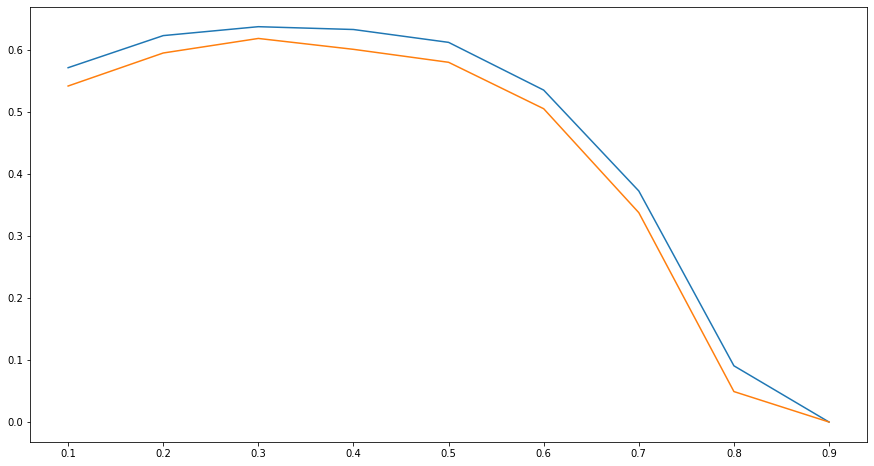

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(np.arange(0.1,1,0.1),result_train)
plt.plot(np.arange(0.1,1,0.1),result_test) #From the plot, The most powerful cutoff is 0.3

DecisionTree Training

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
enc = ColumnTransformer([('cat',OrdinalEncoder(),cat_col),('num','passthrough',num_col)])
model = DTC()
tree_pipe = make_pipeline(enc,model)

In [ ]:
tree_pipe.fit(Xtrain,Ytrain)
tree_pipe.score(Xtrain,Ytrain)

0.9989858012170385

In [ ]:
tree_pipe.score(Xtest,Ytest) #overfitting

0.7406530998580217

In [ ]:
tree_pipe.get_params()

In [ ]:
tree_param = {'decisiontreeclassifier__ccp_alpha':np.arange(0,1,0.1),
            'decisiontreeclassifier__class_weight':['None','balanced'],
            'decisiontreeclassifier__max_depth':np.arange(3,10,1).tolist(),
            'decisiontreeclassifier__min_samples_split':np.arange(2,10,1).tolist(),
            'decisiontreeclassifier__min_samples_leaf':np.arange(2,10,1).tolist()}

In [ ]:
search = GridSearchCV(tree_pipe,tree_param,scoring='accuracy',cv=5)
search.fit(Xtrain,Ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
22400 fits failed out of a total of 44800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
22400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-pa

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OrdinalEncoder(),
                                                                         ['gender',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'MultipleLines',
                                                                          'InternetService',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                    